In [29]:
# import libraries
from pprint import pprint
import importlib
import matplotlib.pyplot as plt
import pandas as pd

import my_functions as mf

In [41]:
# Get the catalogue from "Our World in Data"
from owid import catalog
cat = catalog.find(namespace="covid")

importlib.reload(mf)
mf.disp_catalogue_info(cat)

Row   | Table                          | Dataset                        | Formats                       
------------------------------------------------------------------------------------------
0     | cases_and_deaths_who           | cases_and_deaths_who           | ['feather']                   
1     | cases_deaths                   | cases_deaths                   | ['feather' 'csv']             
2     | chile                          | deaths_vax_status              | ['feather' 'parquet']         
3     | combined                       | combined                       | ['feather' 'parquet']         
4     | compact                        | compact                        | ['feather' 'csv']             
5     | contributions                  | github_stats                   | ['feather' 'parquet']         
6     | country_counts                 | countries_reporting            | ['feather' 'parquet']         
7     | country_counts                 | oxcgrt_policy               

In [49]:
# Load a data set
row_num = 1 # the row from which the data set is defined.


# Show results
pprint(list(tb.columns)[0:5]) # first six columns
tb.tail() # show the tail of dataframe

['new_cases', 'total_cases', 'new_deaths', 'total_deaths', 'weekly_cases']


new_cases  total_cases  new_deaths  total_deaths  \
country  date                                                           
Zimbabwe 2025-02-26          0       266410           0          5740   
         2025-02-27          0       266410           0          5740   
         2025-02-28          0       266410           0          5740   
         2025-03-01          0       266410           0          5740   
         2025-03-02          0       266410           0          5740   

                     weekly_cases  weekly_deaths  weekly_pct_growth_cases  \
country  date                                                               
Zimbabwe 2025-02-26             0              0                     <NA>   
         2025-02-27             0              0                     <NA>   
         2025-02-28             0              0                     <NA>   
         2025-03-01             0              0                     <NA>   
         2025-03-02             0              0                     <NA>   

                     weekly_pct_growth_deaths  biweekly_cases  \
country  date                                                   
Zimbabwe 2025-02-26                      <NA>               0   
         2025-02-27                      <NA>               0   
         2025-02-28                      <NA>               0   
         2025-03-01                      <NA>               0   
         2025-03-02                      <NA>               0   

                     biweekly_deaths  ...  cfr_100_cases  cfr_short_term  \
country  date                         ...                                  
Zimbabwe 2025-02-26                0  ...       2.154574            <NA>   
         2025-02-27                0  ...       2.154574            <NA>   
         2025-02-28                0  ...       2.154574            <NA>   
         2025-03-01                0  ...       2.154574            <NA>   
         2025-03-02                0  ...       2.154574            <NA>   

                     days_since_100_total_cases  days_since_5_total_deaths  \
country  date                                                                
Zimbabwe 2025-02-26                        1737                       1819   
         2025-02-27                        1738                       1820   
         2025-02-28                        1739                       1821   
         2025-03-01                        1740                       1822   
         2025-03-02                        1741                       1823   

                     days_since_1_total_cases_per_million  \
country  date                                               
Zimbabwe 2025-02-26                                  1779   
         2025-02-27                                  1780   
         2025-02-28                                  1781   
         2025-03-01                                  1782   
         2025-03-02                                  1783   

                     days_since_0_1_total_deaths_per_million  \
country  date                                                  
Zimbabwe 2025-02-26                                     1819   
         2025-02-27                                     1820   
         2025-02-28                                     1821   
         2025-03-01                                     1822   
         2025-03-02                                     1823   

                     days_since_100_total_cases_and_5m_pop  \
country  date                                                
Zimbabwe 2025-02-26                                   1737   
         2025-02-27                                   1738   
         2025-02-28                                   1739   
         2025-03-01                                   1740   
         2025-03-02                                   1741   

                     total_deaths_last12m  total_deaths_per_100k_last12m  \
country  date                                

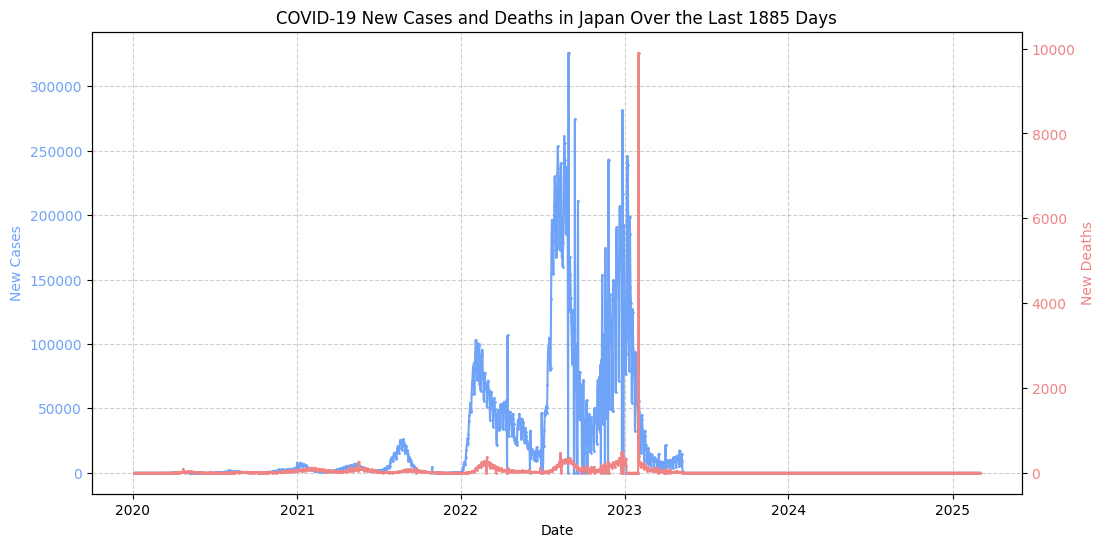

In [58]:
# Plot new cases and new deaths by country.
importlib.reload(mf)
# mf.disp_catalogue_info(cat)
# tb1 = cat.iloc[1].load()
mf.plot_cases_deaths_by_country(tb1, 'Japan', None)


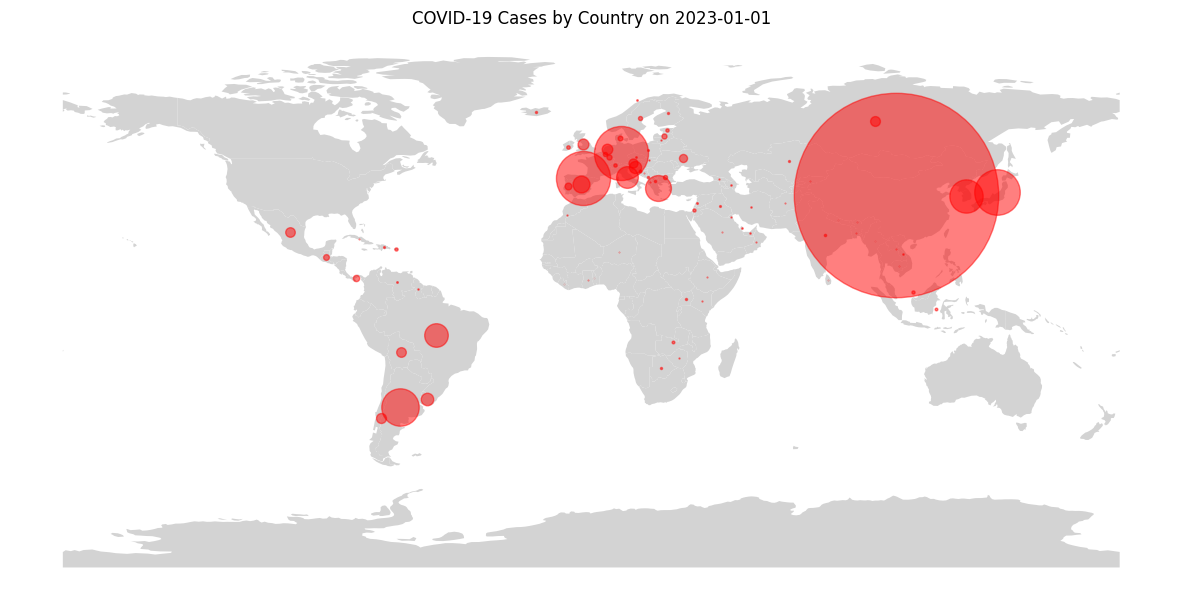

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

def plot_world_map_with_circles(tb1, date, shapefile_path='ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'):
    # Filter data for the specific date
    tb_date = tb1.xs(date, level='date')  # Use the date from the MultiIndex

    # Create a dictionary of country name to number of cases for that date
    country_cases = dict(zip(tb_date.index.get_level_values('country'), tb_date['new_cases']))

    # Load the shapefile using geopandas
    world = gpd.read_file(shapefile_path)

    # Create a GeoDataFrame for plotting the world map
    fig, ax = plt.subplots(figsize=(15, 10))
    world.plot(ax=ax, color='lightgray')

    # Add circles to represent the number of cases in each country
    for country, cases in country_cases.items():
        try:
            # Get the centroid of the country
            country_geom = world[world['ADMIN'] == country].geometry.iloc[0]  # Change 'ADMIN' to match the country name column
            country_centroid = country_geom.centroid

            # Create a circle at the centroid location with size based on cases
            ax.scatter(country_centroid.x, country_centroid.y, s=cases / 100, color='red', alpha=0.5)
        except IndexError:
            continue  # In case a country is missing from the shapefile

    # Add title and show the plot
    plt.title(f'COVID-19 Cases by Country on {date}')
    plt.axis('off')
    plt.show()

# Example usage:
# Assuming tb1 is the dataframe with COVID-19 data.
plot_world_map_with_circles(tb1, "2023-01-01")
